# ECS 171 Project - Detecting Phishing Websites
# label of 1 means not phishing, label of 0 means phishing

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/phishing_url_website.csv')
df.head(n=20)

URL                         Domain  \
0         https://www.southbankmosaics.com       www.southbankmosaics.com   
1                 https://www.uni-mainz.de               www.uni-mainz.de   
2           https://www.voicefmradio.co.uk         www.voicefmradio.co.uk   
3          https://www.globalreporting.org        www.globalreporting.org   
4               https://www.nerdscandy.com             www.nerdscandy.com   
5           https://www.hyderabadonline.in         www.hyderabadonline.in   
6                      https://www.aap.org                    www.aap.org   
7       https://www.religionenlibertad.com     www.religionenlibertad.com   
8                  http://www.teramill.com               www.teramill.com   
9                    https://www.aoh61.com                  www.aoh61.com   
10             https://www.bulgariaski.com            www.bulgariaski.com   
11               https://www.brightika.com              www.brightika.com   
12                   https://www.motley.ie                  www.motley.ie   
13                  https://www.funzine.hu                 www.funzine.hu   
14                 https://www.ooty.ind.in                www.ooty.ind.in   
15              https://www.bwresearch.com             www.bwresearch.com   
16   https://www.musicvideoproduction.guru  www.musicvideoproduction.guru   
17  https://service-mitld.firebaseapp.com/  service-mitld.firebaseapp.com   
18       http://www.kuradox92.lima-city.de     www.kuradox92.lima-city.de   
19             https://liuy-9a930.web.app/             liuy-9a930.web.app   

     TLD  URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
0    com          100.000000                           1   
1     de          100.000000                           2   
2     uk          100.000000                           2   
3    org          100.000000                           1   
4    com          100.000000                           1   
5     in          100.000000                           1   
6    org          100.000000                           1   
7    com          100.000000                           1   
8    com           82.644628                           1   
9    com          100.000000                           1   
10   com          100.000000                           1   
11   com          100.000000                           1   
12    ie          100.000000                           1   
13    hu          100.000000                           1   
14    in          100.000000                           2   
15   com          100.000000                           1   
16  guru          100.000000                           1   
17   com           64.645264                           3   
18    de           45.849802                           3   
19   app           54.515919                           3   

    SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                   0.032        1         558   
1                   0.087        1         618   
2                   0.069        1         467   
3                   0.033        1        1210   
4                   0.040        1         514   
5                   0.034        1        2371   
6                   0.056        1        2730   
7                   0.030        1        2616   
8                   0.045        0           2   
9                   0.050        1        5966   
10                  0.038        1        2639   
11                  0.042        1        5509   
12                  0.050        1        2839   
13                  0.048        1        1576   
14                  0.091        1         719   
15                  0.040        1         317   
16                  0.028        1         795   
17                  0.081        1          16   
18                  0.094        0          43   
19                  0.115        1         108   

                                                Title  DomainTitleMatchScore  \
0   à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆ

In [3]:
# Equalizing the number of samples for each class
count = df['label'].value_counts()

n = count[0]

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_0 = df_0.sample(n=n, random_state=42, replace=False)
df_1 = df_1.sample(n=n, random_state=42, replace=False)

df = pd.concat([df_0, df_1])

In [4]:
import re

def tokenizeURL(url):
    tokens = re.split(r'\W+', url)
    tokens = [token.lower() for token in tokens if token]
    return tokens

df['tokenized_url'] = df['URL'].apply(tokenizeURL)
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693                  0          0       0            0      0   
52794                  0          0       0            0      0   
145305                 0          0       1            2      0   
72762                  0          0       0            0      0   
28644                  0          1       1            1      0   

                             tokenized_url  
55693      [https, safnbyu, 8uv, web, app]  
52794    [https, stepp17, d761f, web, app]  
145305       [https, bt8m1f, webwave, dev]  
72762   [https, www, capitalcomputer, com]  
28644   [https, servizi, id, info, utenza]  

[5 rows x 21 columns]

In [5]:
from gensim.models import FastText

# Get the tokenized URLs and train the Word2Vec model
tokenized_urls = df['tokenized_url'].tolist()
model = FastText(sentences=tokenized_urls, vector_size=100, window=5, min_count=1, workers=4)

In [6]:
model.save('url_fasttext.model')

In [7]:
# Function to aggregate token vectors
def aggregate_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [8]:
# Create URL vectors
df['url_vector'] = df['tokenized_url'].apply(lambda x: aggregate_vectors(x, model))

In [9]:
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        HasDescription  HasSocialNet  HasSubmitButton  HasCopyrightInfo  \
55693                0             0                0                 0   
52794                0             0                0                 0   
145305               1             0                0                 0   
72762                0             0                0                 0   
28644                1             0                0                 0   

        NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693           0       0            0      0   
52794           0       0            0      0   
145305          0       1            2      0   
72762           0       0            0      0   
28644           1       1            1      0   

                             tokenized_url  \
55693      [https, safnbyu, 8uv, web, app]   
52794    [https, stepp17, d761f, web, app]   
145305       [https, bt8m1f, webwave, dev]   
72762   [https, www, capitalcomputer, com]   
28644   [https, servizi, id, info, utenza]   

                                               url_vector  
55693   [0.3475948, 1.4093195, 1.3019441, -0.03689987,...  
52794   [0.32419723, 1.4098314, 1.3453372, -0.02811004...  
145305  [-0.051710814, 0.41407585, 2.8286245, -0.83450...  
72762   [-0.33301985, 0.14883038, 1.2725883, 0.1311835...  
28644   [-0.40208235, 0.21951151, 0.72753364, 0.296718...  

[5 rows x 22 columns]

In [10]:
# Expand URL vectors into separate columns
url_vector_df = pd.DataFrame(df['url_vector'].to_list(), index=df.index)

# Combine with other features
combined_df = pd.concat([df.drop(columns=['URL', 'tokenized_url', 'url_vector', "TLD", "Domain", "Title"]), url_vector_df], axis=1)

combined_df.head()

URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode  DomainTitleMatchScore  URLTitleMatchScore  \
55693         1         108                    0.0                 0.0   
52794         1           9                    0.0                 0.0   
145305        1          58                    0.0                 0.0   
72762         1           9                    0.0                 0.0   
28644         1          63                    0.0               100.0   

        IsResponsive  HasDescription  HasSocialNet  ...        90        91  \
55693              1               0             0  ...  0.776444 -0.406921   
52794              0               0             0  ...  0.805520 -0.455216   
145305             0               1             0  ...  0.130188  0.490470   
72762              0               0             0  ...  0.736608 -0.469328   
28644              1               1             0  ...  0.719714 -0.905047   

              92        93        94        95        96        97        98  \
55693   0.696558  0.965092 -0.159821  0.323105  2.225631  0.218365  0.700212   
52794   0.701732  1.014041 -0.152495  0.381462  2.266303  0.227202  0.730650   
145305  1.407490  2.549508  0.023269  1.287594  0.514734 -0.145511 -0.139973   
72762  -0.019302  0.889933  0.479549  1.052755  0.480581 -0.133611 -0.264968   
28644   0.297036  0.782609  0.376069  0.813132  0.770626  0.332547  0.483387   

              99  
55693  -1.008693  
52794  -1.063322  
145305 -1.698017  
72762  -1.373308  
28644  -1.395900  

[5 rows x 116 columns]

In [11]:
correlation_matrix = combined_df.corr()

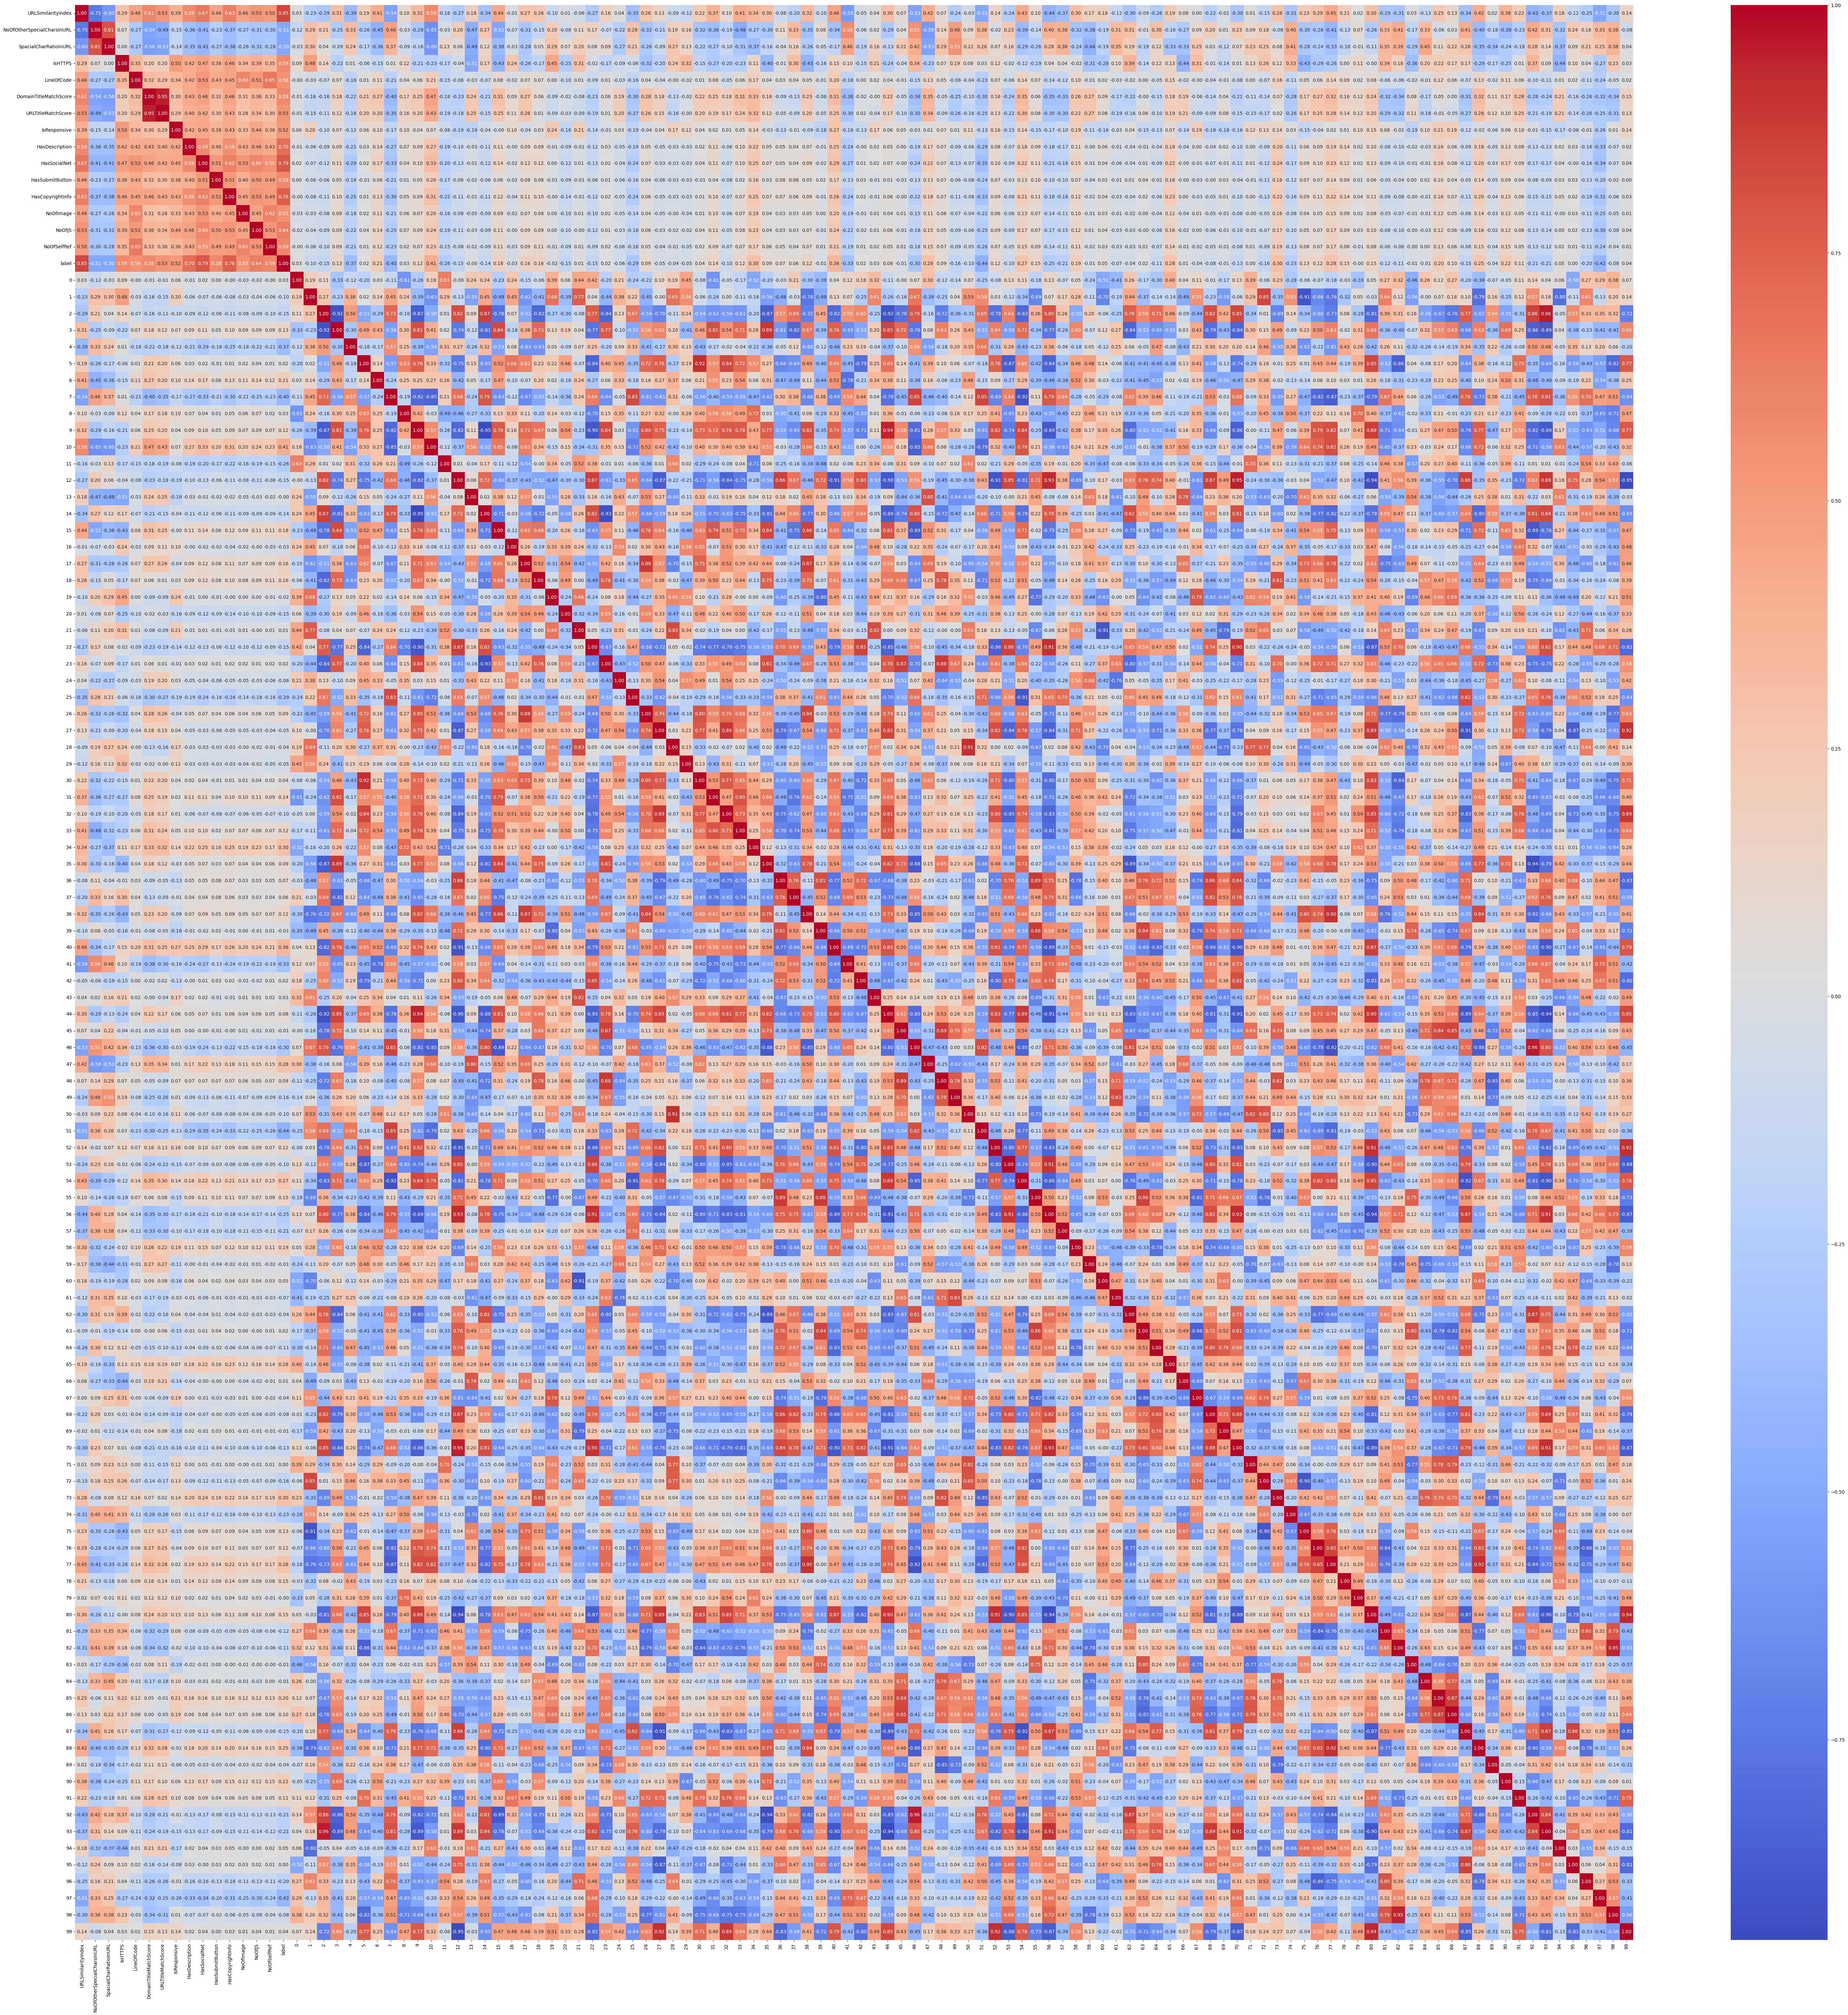

                            URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
URLSimilarityIndex                    1.000000                   -0.749040   
NoOfOtherSpecialCharsInURL           -0.749040                    1.000000   
SpacialCharRatioInURL                -0.595951                    0.807249   
IsHTTPS                               0.289131                    0.065941   
LineOfCode                            0.463567                   -0.271495   
...                                        ...                         ...   
95                                   -0.124592                    0.236702   
96                                   -0.248372                    0.158944   
97                                   -0.508070                    0.329829   
98                                   -0.295339                    0.381416   
99                                    0.140174                   -0.075735   

                            SpacialCharRatioInURL   IsHTTPS  Li

In [12]:
plt.figure(figsize=(75, 75))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('correlation_matrix.png')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

In [13]:
CORRELATION_THRESHOLD = 0.3

# Get the features that are highly correlated with the target but not part of the URL vector
correlated_features = correlation_matrix['label'][abs(correlation_matrix['label']) > CORRELATION_THRESHOLD].index

# Display the highly correlated features
print(correlated_features)

# Drop all features that are not highly correlated with the target
combined_df = combined_df[correlated_features].drop(columns=['NoOfOtherSpecialCharsInURL', 'URLTitleMatchScore', 'URLSimilarityIndex'])

# Display the new dataframe
combined_df.head()

# change all column labels to strings
combined_df.columns = [str(col) for col in combined_df.columns]

Index([        'URLSimilarityIndex', 'NoOfOtherSpecialCharsInURL',
            'SpacialCharRatioInURL',                    'IsHTTPS',
                       'LineOfCode',      'DomainTitleMatchScore',
               'URLTitleMatchScore',               'IsResponsive',
                   'HasDescription',               'HasSocialNet',
                  'HasSubmitButton',           'HasCopyrightInfo',
                        'NoOfImage',                     'NoOfJS',
                      'NoOfSelfRef',                      'label',
                                  4,                            7,
                                 10,                           40,
                                 41,                           51,
                                 73,                           97],
      dtype='object')


In [14]:
combined_df.head()

SpacialCharRatioInURL  IsHTTPS  LineOfCode  DomainTitleMatchScore  \
55693                   0.143        1         108                    0.0   
52794                   0.103        1           9                    0.0   
145305                  0.111        1          58                    0.0   
72762                   0.033        1           9                    0.0   
28644                   0.100        1          63                    0.0   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  ...  NoOfSelfRef  label         4  \
55693                  0          0  ...            0      0  1.286816   
52794                  0          0  ...            0      0  1.342135   
145305                 0          0  ...            2      0  2.045645   
72762                  0          0  ...            0      0  1.257685   
28644                  0          1  ...            1      0  1.384234   

               7        10        40        41        51        73        97  
55693   2.383128 -0.674421 -0.393623 -0.628154  1.650226 -1.238490  0.218365  
52794   2.479986 -0.699211 -0.445644 -0.649896  1.695052 -1.273639  0.227202  
145305  2.307306 -0.836414 -1.324158 -0.374358  1.756002 -1.169008 -0.145511  
72762   1.228517 -0.013516 -0.678026 -1.097674  1.195528 -1.351255 -0.133611  
28644   1.857249 -0.295257 -0.832860 -0.572307  1.255315 -0.921662  0.332547  

[5 rows x 21 columns]

In [15]:
print(combined_df.shape[0])

144074


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 42

sklearn_models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=combined_df.shape[0]),
    'Support Vector Machine': SVC(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss') ,
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2)
}

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# normalize every column except the target and IsHTTPS, IsResponsive, HasDescription, HasSocialNet, HasSubmitButton, HasCopyrightInfo, SpecialCharRatioInURL
scaler = MinMaxScaler()

normalized_df = combined_df.copy()
normalized_df[normalized_df.columns.difference(['label', 'IsHTTPS', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo'])] = scaler.fit_transform(normalized_df[normalized_df.columns.difference(['label', 'IsHTTPS', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo'])])

X = normalized_df.drop(columns=['label'])
y = normalized_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

normalized_df.head()

SpacialCharRatioInURL  IsHTTPS  LineOfCode  DomainTitleMatchScore  \
55693                0.880282        1    0.009300                    0.0   
52794                0.598592        1    0.000614                    0.0   
145305               0.654930        1    0.004913                    0.0   
72762                0.105634        1    0.000614                    0.0   
28644                0.577465        1    0.005352                    0.0   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  ...  NoOfSelfRef  label         4  \
55693                  0   0.000000  ...     0.000000      0  0.375523   
52794                  0   0.000000  ...     0.000000      0  0.397612   
145305                 0   0.000000  ...     0.003361      0  0.678528   
72762                  0   0.000000  ...     0.000000      0  0.363891   
28644                  0   0.003788  ...     0.001681      0  0.414423   

               7        10        40        41        51        73        97  
55693   0.342866  0.595332  0.970110  0.449588  0.297890  0.735228  0.567877  
52794   0.360522  0.582950  0.957480  0.441997  0.310080  0.728048  0.571528  
145305  0.329044  0.514420  0.744184  0.538195  0.326655  0.749421  0.417542  
72762   0.132395  0.925439  0.901059  0.285667  0.174239  0.712193  0.422458  
28644   0.247005  0.784716  0.863467  0.469086  0.190497  0.799946  0.615051  

[5 rows x 21 columns]

In [18]:
# save scaler for future use
import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [19]:
def train_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

In [20]:
results = {}

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

for name, model in sklearn_models.items():
    models = []
    accuracy = []
    report = []
    confusion = []
    roc_aucs = [] 
    fprs = [] 
    tprs = [] 

    for train_index, test_index in kf.split(X):
        print(f'Training {name} model...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_pred = train_model(model, X_train, y_train, X_test)
        acc, rep, conf = evaluate_model(y_test, y_pred)

        models.append(model)
        accuracy.append(acc)
        report.append(rep)
        confusion.append(conf)
    

    results[name] = {
        'model': models,
        'accuracy': accuracy,
        'report': report,
        'confusion': confusion,
        'roc_auc': roc_aucs,
        'fpr': fprs,
        'tpr': tprs 
    }

Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...


In [22]:
for name, result in results.items():
    print(f'{name}:\n')
    for i in range(5):
        print(f'Fold {i+1}:\n')
        print(f'Accuracy: {result["accuracy"][i]}\n')
        print(f'Report: {result["report"][i]}\n')
        print(f'Confusion Matrix:\n{result["confusion"][i]}\n')
        print('\n')

Random Forest:

Fold 1:

Accuracy: 0.9993753253513795

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815


Confusion Matrix:
[[14548    13]
 [    5 14249]]



Fold 2:

Accuracy: 0.9992365087627971

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14223
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815


Confusion Matrix:
[[14208    15]
 [    7 14585]]



Fold 3:

Accuracy: 0.9993753253513795

Report:               precision    recall  f1-score   support

           0       1.00     

In [ ]:
# Iterate through the results to plot each model's accuracies
for name, result in results.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    folds = np.arange(1, len(result["accuracy"]) + 1)
    ax.plot(folds, result["accuracy"], marker='o', linestyle='-', color='b', label='Accuracy')
    ax.set_xlabel('Fold')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{name} Model Accuracies Across Folds')
    ax.set_xticks(folds)
    ax.grid(True)
    ax.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, result in results.items():
    confusion_matrices = results[name]["confusion"]
    
    # Create a 1x5 grid of subplots
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'{name} Model Confusion Matricies Across Folds', fontsize=16)

    
    # Iterate over each confusion matrix and corresponding subplot
    for i, (matrix, ax) in enumerate(zip(confusion_matrices, axs)):
        # Plot the confusion matrix as a heatmap
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
        
        # Set labels and title for each subplot
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Confusion Matrix - Fold {i+1}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
        
    # Show the plot
    plt.show()

In [ ]:
# Iterate through the results to plot each model's ROC AUC
for name, result in results.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    folds = np.arange(1, len(result["roc_auc"]) + 1)
    ax.plot(folds, result["roc_auc"], marker='o', linestyle='-', color='b', label='ROC AUC')
    ax.set_xlabel('Fold')
    ax.set_ylabel('ROC AUC')
    ax.set_title(f'{name} Model ROC AUC Across Folds')
    ax.set_xticks(folds)
    ax.grid(True)
    ax.legend()
    plt.show()

In [ ]:
max_accuracy = []
min_fps = []
min_fns = []
max_roc_aucs = []

for name, result in results.items():
    min_fp = 1000
    min_fn = 1000
    max_accuracy.append(max(results[name]['accuracy']))
    max_roc_aucs.append(max(results[name]['roc_auc']))
    for matrix in results[name]['confusion']:
        if matrix[0][1] < min_fp:
            min_fp = matrix[0][1] 

        if matrix[1][0] < min_fn:
            min_fn = matrix[1][0]
    min_fps.append(min_fp)
    min_fns.append(min_fn)


print(max_accuracy)
print(max_roc_aucs)
print(min_fps)
print(min_fns)

In [ ]:
# Create a list of model names
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'KNN']

# Create a figure with 1x4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plotting max_accuracy
for i, (acc, model) in enumerate(zip(max_accuracy, model_names)):
    axs[0].plot(model, acc, marker='o', color='b')
    axs[0].text(i, acc, f'{acc}', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Accuracy')
axs[0].set_title('Max Accuracy Across Models')

# Plotting max_roc_aucs
for i, (auc, model) in enumerate(zip(max_roc_aucs, model_names)):
    axs[1].plot(model, auc, marker='o', color='r')
    axs[1].text(i, auc, f'{auc}', ha='center', va='bottom', fontsize=8)

axs[1].set_ylabel('ROC AUC')
axs[1].set_title('Max ROC AUC Across Models')

# Plotting min_fps
for i, (fp, model) in enumerate(zip(min_fps, model_names)):
    axs[2].plot(model, fp, marker='o', color='g')
    axs[2].text(i, fp, f'{fp}', ha='center', va='bottom', fontsize=8)

axs[2].set_ylabel('False Positives')
axs[2].set_title('Min False Positives Across Models')

# Plotting min_fns
for i, (fn, model) in enumerate(zip(min_fns, model_names)):
    axs[3].plot(model, fn, marker='o', color='m')
    axs[3].text(i, fn, f'{fn}', ha='center', va='bottom', fontsize=8)

axs[3].set_ylabel('False Negatives')
axs[3].set_title('Min False Negatives Across Models')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
import pickle

for name, result in results.items():
    if type(result['model']) == list:
        j = 0
        for i in range(5):
            with open(f'models/{name}_fold_{i}.pkl', 'wb') as file:
                pickle.dump(result['model'][i], file)
            j += 1

    else:
        with open(f'models/{name}.pkl', 'wb') as file:
            pickle.dump(result['model'], file)

In [24]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

neural_networks = {
    'nn1': Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'nn2': Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'nn3': Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
}

2024-06-08 23:18:31.224779: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 23:18:31.650723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/rasooly/miniconda3/envs/ECS171Project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-08 23:18:32.243081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have b

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def train_neural_network(model, X_train, y_train, X_test, y_test):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping], verbose=2)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    return y_pred

In [26]:
for name, model in neural_networks.items():
    print(f'Training {name}...')
    y_pred = train_neural_network(model, X_train, y_train, X_test, y_test)
    accuracy, report, confusion = evaluate_model(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(report)
    print(confusion)
    print()

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion': confusion
    }

Training nn1...
Epoch 1/100
3602/3602 - 4s - 1ms/step - accuracy: 0.9855 - loss: 0.0426 - val_accuracy: 0.9969 - val_loss: 0.0095
Epoch 2/100
3602/3602 - 3s - 824us/step - accuracy: 0.9964 - loss: 0.0126 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 3/100
3602/3602 - 3s - 817us/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.9984 - val_loss: 0.0060
Epoch 4/100
3602/3602 - 3s - 880us/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 0.9985 - val_loss: 0.0057
Epoch 5/100
3602/3602 - 3s - 835us/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.9981 - val_loss: 0.0059
Epoch 6/100
3602/3602 - 3s - 808us/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9985 - val_loss: 0.0059
Epoch 7/100
3602/3602 - 3s - 847us/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9986 - val_loss: 0.0053
Epoch 8/100
3602/3602 - 3s - 854us/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 9/100
3602/3602 - 3s - 881us/step - accuracy: 0.9980

3602/3602 - 3s - 828us/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9986 - val_loss: 0.0054
Epoch 11/100
3602/3602 - 3s - 785us/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.9988 - val_loss: 0.0045
Epoch 12/100
3602/3602 - 3s - 827us/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9989 - val_loss: 0.0041
Epoch 13/100
3602/3602 - 3s - 811us/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9988 - val_loss: 0.0047
Epoch 14/100
3602/3602 - 3s - 791us/step - accuracy: 0.9984 - loss: 0.0061 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 15/100
3602/3602 - 3s - 791us/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9991 - val_loss: 0.0041
Epoch 16/100
3602/3602 - 3s - 825us/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.9989 - val_loss: 0.0047
Epoch 17/100
3602/3602 - 3s - 865us/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0038
Epoch 18/100
3602/3602 - 3s - 813us/step - accuracy: 0.9982 - loss: 0.0060 - 

In [27]:
import joblib

xgboost_model = sklearn_models['XGBoost']
joblib.dump(xgboost_model, 'xgboost_model.joblib')


['xgboost_model.joblib']